In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt

In [2]:
model = ConcreteModel()
model.epsilon=Param(initialize=-100,mutable=True)
model.x1 = Var(bounds=(1,2), within=NonNegativeReals)
model.x2 = Var(bounds=(1,3), within=NonNegativeReals)
model.eq1= Constraint(expr= -1.2*model.x1**2+5*model.x2>=model.epsilon)
model.obj1 = Objective(expr=2*model.x1-0.5*model.x2**2, sense=maximize)
model.obj2 = Objective(expr=-1.2*model.x1**2+5*model.x2, sense=maximize)
opt = SolverFactory('ipopt')

In [3]:
model.obj2.deactivate() 
results = opt.solve(model) # solves and updates instance
print('x1 = ',round(value(model.x1),2))
print('x2 = ',round(value(model.x2),2))
print('obj1 = ',round(value(model.obj1),2))
print('obj2 = ',round(value(model.obj2),2))
maxOF1=value(model.obj1)
minOF2=value(model.obj2)

x1 =  2.0
x2 =  1.0
obj1 =  3.5
obj2 =  0.2


In [4]:
model.obj1.deactivate() 
model.obj2.activate() 
results = opt.solve(model) # solves and updates instance
print('x1 = ',round(value(model.x1),2))
print('x2 = ',round(value(model.x2),2))
print('obj1 = ',round(value(model.obj1),2))
print('obj2 = ',round(value(model.obj2),2))
minOF1=value(model.obj1)
maxOF2=value(model.obj2)

x1 =  1.0
x2 =  3.0
obj1 =  -2.5
obj2 =  13.8


In [5]:
model.obj1.activate() 
model.obj2.deactivate() 
Nsteps=21
X=[]
Y=[]
print('  x1  ',' x2 ',' OF1 ',' OF2 ',' Epsilon ')
for counter in range(1,Nsteps+1):
    model.epsilon=minOF2+(maxOF2-minOF2)*(counter-1)/(Nsteps-1)
    results = opt.solve(model) # solves and updates instance
    print("%5.2f"% value(model.x1),"%5.2f"% value(model.x2),"%5.2f"% value(model.obj1),"%5.2f"% value(model.obj2), "%5.2f"% value(model.epsilon))
    X.append(value(model.obj1))
    Y.append(value(model.obj2))

  x1    x2   OF1   OF2   Epsilon 
 2.00  1.00  3.50  0.20  0.20
 2.00  1.14  3.35  0.88  0.88
 2.00  1.27  3.19  1.56  1.56
 2.00  1.41  3.01  2.24  2.24
 2.00  1.54  2.81  2.92  2.92
 2.00  1.68  2.59  3.60  3.60
 2.00  1.82  2.35  4.28  4.28
 2.00  1.95  2.09  4.96  4.96
 2.00  2.09  1.82  5.64  5.64
 1.93  2.16  1.53  6.32  6.32
 1.86  2.23  1.23  7.00  7.00
 1.80  2.31  0.92  7.68  7.68
 1.74  2.40  0.60  8.36  8.36
 1.68  2.48  0.27  9.04  9.04
 1.62  2.57 -0.07  9.72  9.72
 1.56  2.67 -0.43 10.40 10.40
 1.51  2.76 -0.80 11.08 11.08
 1.46  2.86 -1.18 11.76 11.76
 1.41  2.96 -1.58 12.44 12.44
 1.25  3.00 -2.00 13.12 13.12
 1.00  3.00 -2.50 13.80 13.80


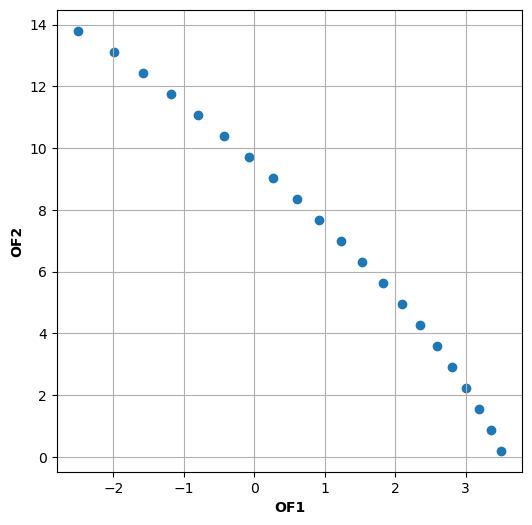

In [9]:
fig = plt.figure(figsize=(6,6))
plt.scatter(X,Y)
plt.xlabel('OF1',fontweight='bold')
plt.ylabel('OF2',fontweight='bold')
plt.grid()
plt.show()